In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

In [2]:
df=pd.read_csv('Titanic_test.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df.duplicated().sum()

0

# Filling the null values:-

In [5]:
mean=df['Age'].mean()
mean

30.272590361445783

In [6]:
mean=df['Fare'].mean()
mean

35.6271884892086

In [7]:
df['Age']=df['Age'].fillna(30)
df['Cabin']=df['Cabin'].fillna('C63')
df['Fare']=df['Fare'].fillna(22.8059)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C63,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C63,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C63,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C63,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C63,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,C63,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C63,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,C63,S


In [8]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.030935,0.003818,0.043080,0.008466
Pclass,-0.026751,1.000000,-0.443234,0.001087,0.018721,-0.577063
Age,-0.030935,-0.443234,1.000000,-0.078870,-0.044980,0.327089
SibSp,0.003818,0.001087,-0.078870,1.000000,0.306895,0.171752
Parch,0.043080,0.018721,-0.044980,0.306895,1.000000,0.230207
Fare,0.008466,-0.577063,0.327089,0.171752,0.230207,1.000000


In [10]:
df.cov()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,14595.166667,-2.720624,-47.219856,0.413669,5.107914,57.118287
Pclass,-2.720624,0.708690,-4.714514,0.000820,0.015467,-27.128655
Age,-47.219856,-4.714514,159.643625,-0.893638,-0.557763,230.790796
SibSp,0.413669,0.000820,-0.893638,0.804178,0.270100,8.601094
Parch,5.107914,0.015467,-0.557763,0.270100,0.963203,12.616938
Fare,57.118287,-27.128655,230.790796,8.601094,12.616938,3118.554760


In [11]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.216507,0.447368,0.392344,35.596516
std,120.810458,0.841838,12.635016,0.896760,0.981429,55.844022
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
target=df[['Sex']]
target

,Sex
0,male
1,female
2,male
3,male
4,female
...,...
413,male
414,female
415,male
416,male


In [13]:
feature=df.drop(['Sex','Cabin','Ticket','Embarked','Name'],axis=1)
feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.0,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,30.0,0,0,8.0500


In [14]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=100)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(313, 6)
(105, 6)
(313, 1)
(105, 1)


In [16]:
log_model=LogisticRegression()

In [17]:
log_model.fit(x_train,y_train)

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Indranil Joshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred=log_model.predict(x_test)
y_pred

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male'], dtype=object)

In [19]:
accuracy_score(y_test,y_pred)

0.6

In [20]:
log_model.coef_

array([[ 0.00050725,  0.24914316,  0.02090459, -0.09960971, -0.08034285,
        -0.00757771]])

In [21]:
log_model.intercept_

array([-0.78402996])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

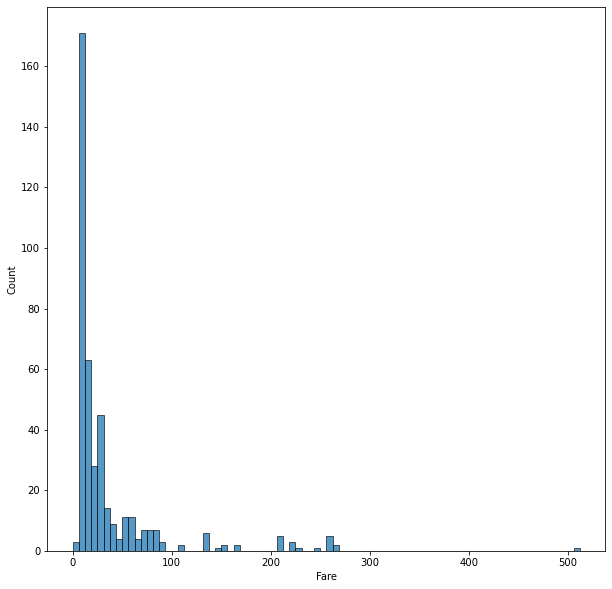

In [22]:
fig=plt.figure(figsize=(10,10))
sns.histplot(df['Fare'])

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

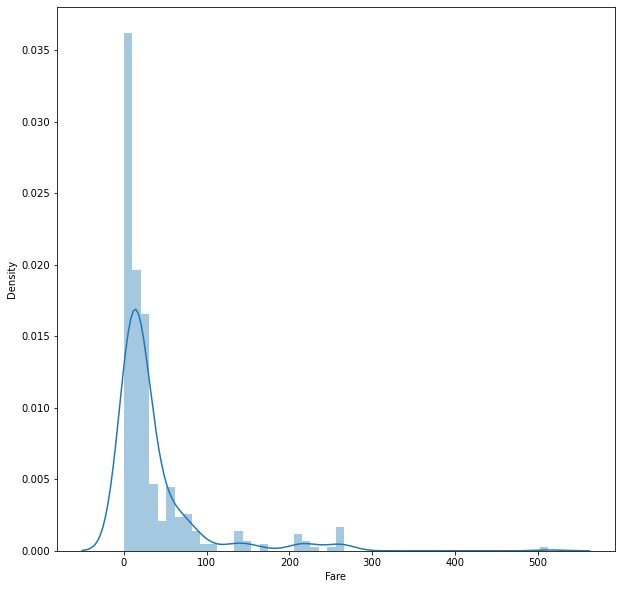

In [23]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['Fare'])

In [24]:
df['Fare'].skew()

3.6925281022753618

In [25]:
df['Fare'].kurt()

17.974167640085586

C:\Users\Indranil Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

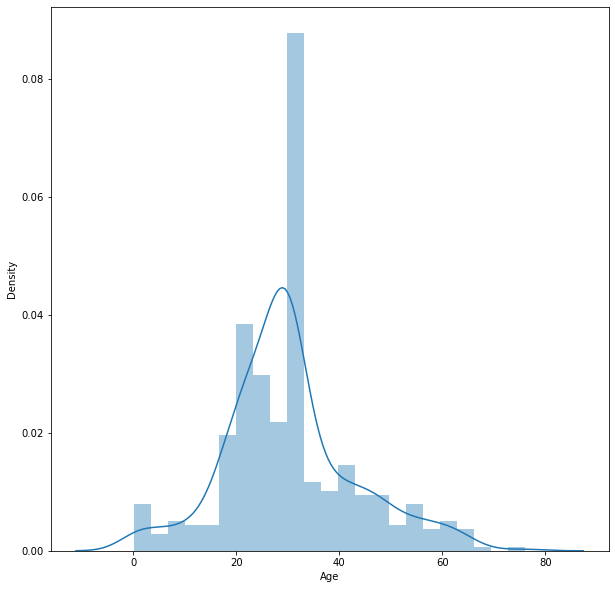

In [26]:
fig=plt.figure(figsize=(10,10))
sns.distplot(df['Age'])

In [27]:
df['Age'].skew()

0.5260300590601745

In [28]:
df['Age'].kurt()

0.8918905093494547

<AxesSubplot:>

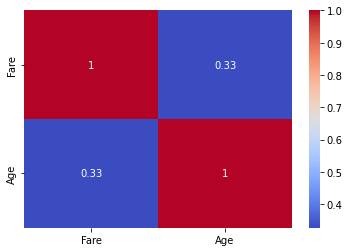

In [29]:
sns.heatmap(df[['Fare','Age']].corr(),annot=True,cmap='coolwarm')

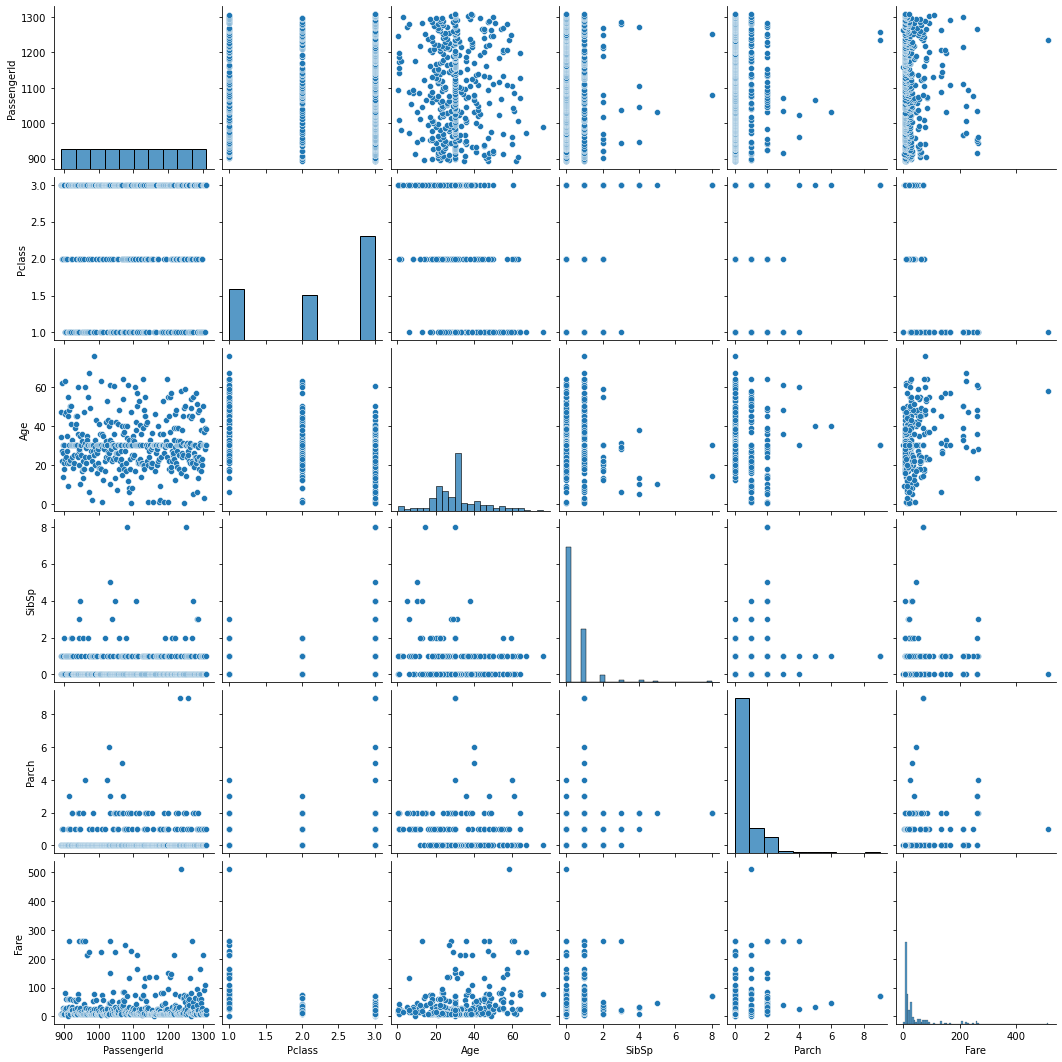

In [30]:
sns.pairplot(df)

<AxesSubplot:>

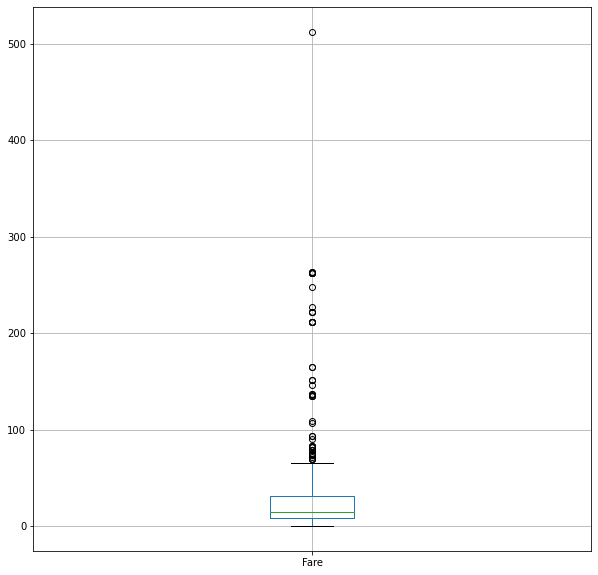

In [31]:
fig=plt.figure(figsize=(10,10))
df.boxplot('Fare')

In [32]:
Q1=df['Fare'].quantile(0.25)
Q1

7.8958

In [33]:
Q3=df['Fare'].quantile(0.75)
Q3

31.471875

In [34]:
IQR=Q3-Q1
IQR

23.576075

In [35]:
lower=Q1-1.5*IQR
lower

-27.468312499999996

In [36]:
upper=Q3+1.5*IQR
upper

66.8359875

In [37]:
outliers=df[(df.Fare<lower) | (df.Fare>upper)]
outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5000,C130,C
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5000,C132,C
81,973,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S


<AxesSubplot:>

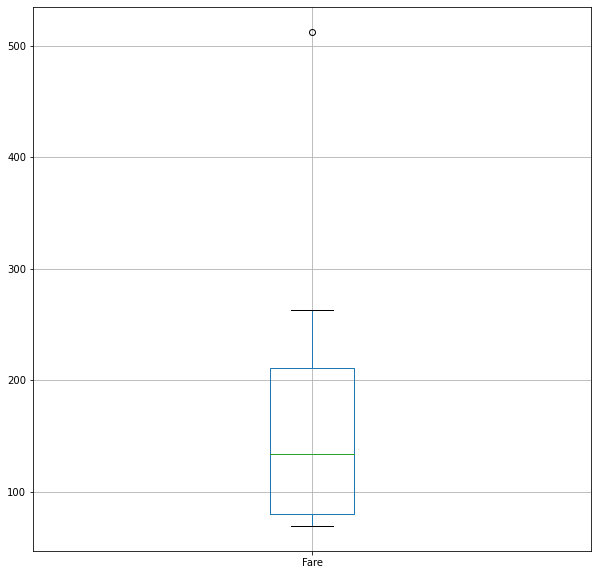

In [38]:
fig=plt.figure(figsize=(10,10))
outliers.boxplot('Fare')

In [39]:
Q1=df['Age'].quantile(0.25)
Q1

23.0

In [40]:
Q3=df['Age'].quantile(0.75)
Q3

35.75

In [41]:
IQR=Q3-Q1
IQR

12.75

In [42]:
lower=Q1-1.5*IQR
lower

3.875

In [43]:
upper=Q3+1.5*IQR
upper

54.875

In [44]:
outliers1=df[(df.Age<lower) | (df.Age>upper)]
outliers1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,C63,Q
13,905,2,"Howard, Mr. Benjamin",male,63.00,1,0,24065,26.0000,C63,S
20,912,1,"Rothschild, Mr. Martin",male,55.00,1,0,PC 17603,59.4000,C63,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.00,0,0,11813,76.2917,D15,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.00,2,0,11770,25.7000,C101,S
81,973,1,"Straus, Mr. Isidor",male,67.00,1,0,PC 17483,221.7792,C55 C57,S
89,981,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,C63,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,1,0,19877,78.8500,C46,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.00,1,0,PC 17483,221.7792,C55 C57,S


<AxesSubplot:>

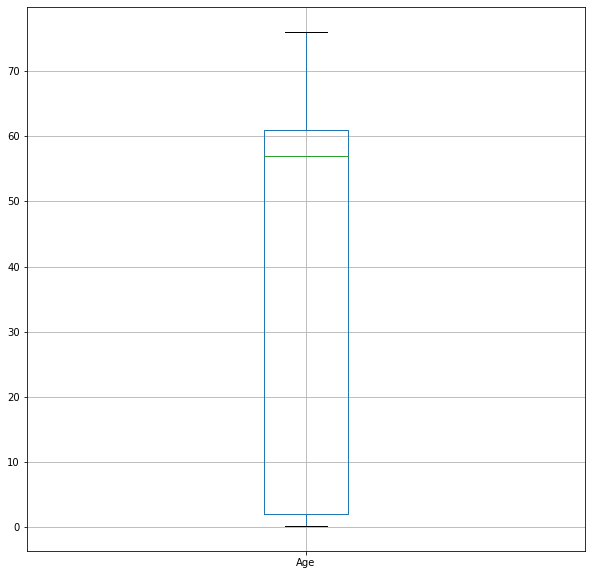

In [45]:
fig=plt.figure(figsize=(10,10))
outliers1.boxplot('Age')

In [46]:
outliers1=df[(df.Age>lower) | (df.Age<upper)]
outliers1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,C63,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C63,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,C63,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C63,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,C63,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,C63,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C63,S
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,C63,S


# Missing null values:-

In [47]:
df1=pd.read_csv('Titanic_test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [48]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [49]:
df1.duplicated().sum()

0

In [50]:
df_new=df1.dropna()
df_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [51]:
df_new.shape

(87, 11)

In [52]:
df1.shape

(418, 11)

# Using statsmodels:-

In [53]:
import statsmodels.formula.api as sfa

In [54]:
model=sfa.ols('Fare~PassengerId+Pclass+Age+SibSp+Parch',data=df1).fit()
model

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     45.83
Date:                Wed, 01 May 2024   Prob (F-statistic):           9.32e-36
Time:                        14:59:34   Log-Likelihood:                -1742.8
No. Observations:                 331   AIC:                             3498.
Df Residuals:                     325   BIC:                             3520.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     114.7384     27.695      4.143      0.000      60.254     169.223
PassengerId    -0.0090      0.021     -0.422      0.673      -0.051       0.033
Pclass        -39.3588      3.576    -11.006      0.000     -46.394     -32.323
Age             0.3647      0.215      1.695      0.091      -0.059       0.788
SibSp           5.8044      3.185      1.822      0.069      -0.462      12.071
Parch          16.5991      3.425      4.847      0.000       9.861      23.337
==============================================================================
Omnibus:                      267.612   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5698.719
Skew:                           3.188   Prob(JB):                         0.00
Kurtosis:                      22.301   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model1=sfa.ols('Fare~PassengerId+Pclass+Age+SibSp+Parch',data=df).fit()
model1

In [57]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     57.62
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.19e-45
Time:                        14:59:34   Log-Likelihood:                -2163.2
No. Observations:                 418   AIC:                             4338.
Df Residuals:                     412   BIC:                             4363.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      99.2713     22.443      4.423      0.000      55.155     143.388
PassengerId    -0.0055      0.018     -0.314      0.754      -0.040       0.029
Pclass        -35.3632      2.802    -12.621      0.000     -40.871     -29.855
Age             0.4821      0.187      2.574      0.010       0.114       0.850
SibSp           7.2601      2.481      2.926      0.004       2.383      12.137
Parch          11.9393      2.262      5.277      0.000       7.492      16.386
==============================================================================
Omnibus:                      365.435   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11025.432
Skew:                           3.589   Prob(JB):                         0.00
Kurtosis:                      27.114   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from sklearn.metrics import precision_recall_fscore_support

In [59]:
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)

In [60]:
print('Precision:',precision)
print('Recall:',recall)
print('f1_score:',f1_score)

Precision: [0.41666667 0.62365591]
Recall: [0.125      0.89230769]
f1_score: [0.19230769 0.73417722]


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       0.42      0.12      0.19        40
        male       0.62      0.89      0.73        65

    accuracy                           0.60       105
   macro avg       0.52      0.51      0.46       105
weighted avg       0.54      0.60      0.53       105

